In [64]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

### Make a single time series, nonlinear in time (periodic), noisy

In [65]:
t = np.linspace(0, 10, 2000)
x = np.sin(t) + np.sin(2*t) + np.sin(3*t) + np.random.normal(0, 0.1, len(t))

### Lift into a high dimensional space (time delay embedding)

In [66]:
A = scipy.linalg.hankel(x)[0:209,:]

### Take SVD and look at it

In [67]:
U,E,Vt = np.linalg.svd(A)

E is returned as a row vector, not super useful. Make it an appropriately shaped square. 

In [68]:
if Vt.shape[0] > U.shape[1]:
    E = np.hstack((E, np.zeros(Vt.shape[0] - U.shape[1])))
    Ed = np.diag(E)
    Ed = Ed[0:U.shape[1], :]

Look at U, E, Vt

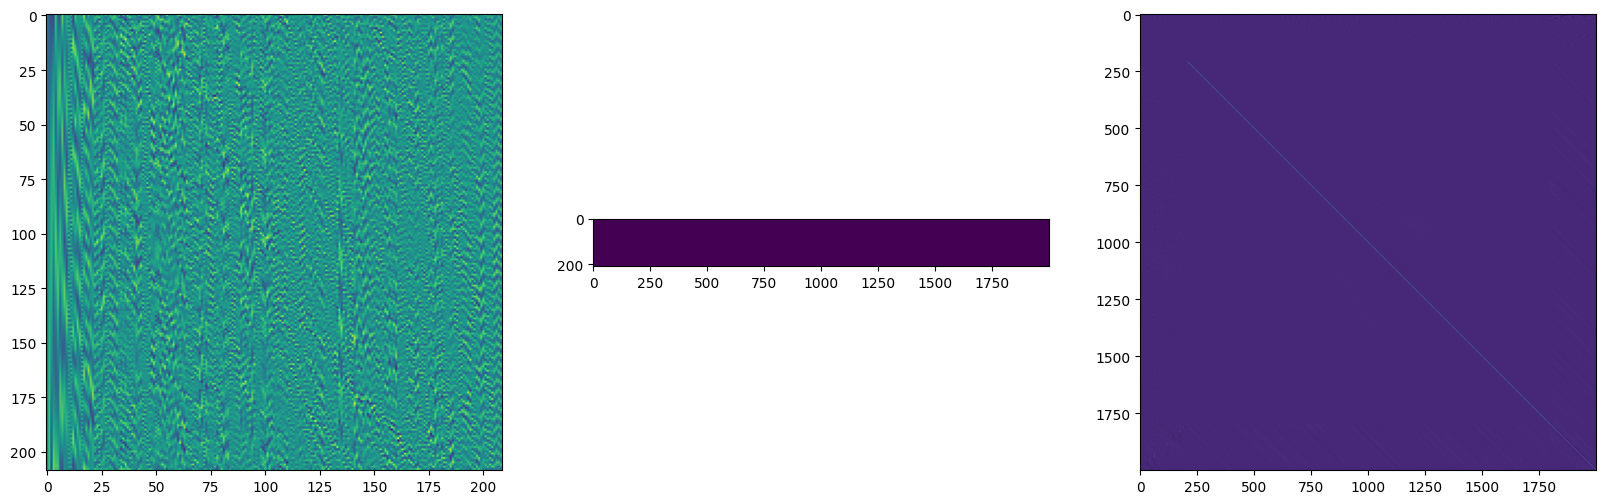

In [69]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
ax1.imshow(U)

ax2 = fig.add_subplot(132)
ax2.imshow(Ed)

ax3 = fig.add_subplot(133)
ax3.imshow(Vt)

Look at first 4 columns of U

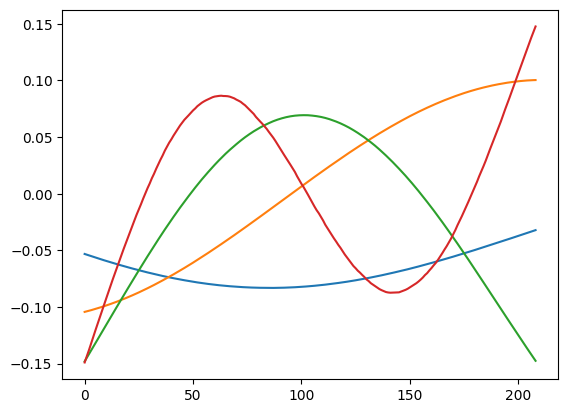

In [70]:
plt.plot(U[:,0])
plt.plot(U[:,1])
plt.plot(U[:,2])
plt.plot(U[:,3])

Reconstruct first column of A

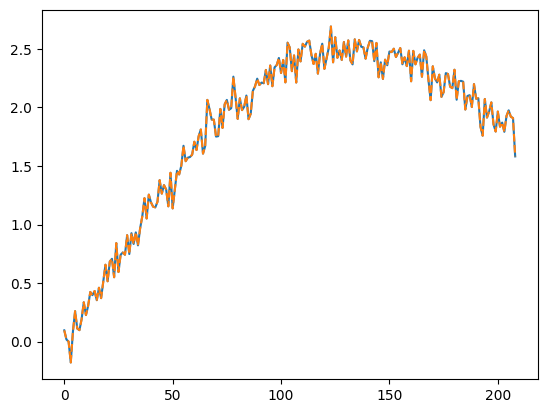

In [71]:
plt.plot(A[:,0])

plt.plot(U@Ed@Vt[:,0], '--')

### Rank truncate SVD

In [74]:
r = 5
Ur = U[:, 0:r]
Er = Ed[0:r, 0:r]
Vtr = Vt[0:r, :]

Reconstruct first column of A using rank truncated SVD components

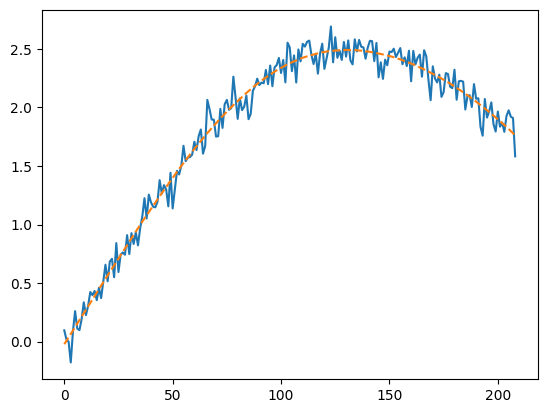

In [75]:
plt.plot(A[:,0])

plt.plot(Ur@Er@Vtr[:,0], '--')

In [77]:
Xnoisy = np.array([[1,2,3,4,5], [10,20,30,40,50]])

In [80]:
num_delays = 2
Yaug = scipy.linalg.hankel(Xnoisy[0,:])[0:num_delays,0:-num_delays]
for i in range(1, Xnoisy.shape[0]):
    Yaug = np.vstack((Yaug, scipy.linalg.hankel(Xnoisy[i,:])[0:num_delays,0:-num_delays]))

In [81]:
Yaug

array([[ 1,  2,  3],
       [ 2,  3,  4],
       [10, 20, 30],
       [20, 30, 40]])